# Lego dataset

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/24/LEGO_logo.svg/2048px-LEGO_logo.svg.png" alt="Lego logo" width="250" height="250" align="left">

<a href="https://www.lego.com/en-us/themes">Lego</a> is a line of plastic construction toys that are manufactured by the Lego Group, a privately held company based in Billund, Denmark. Lego consists of variously colored interlocking plastic bricks made of acrylonitrile butadiene styrene that accompany an array of gears, figurines called minifigures, and various other parts. Lego pieces can be assembled and connected in many ways to construct objects, including vehicles, buildings, and working robots. Anything constructed can be taken apart again, and the pieces reused to make new things.

It may not be widely known, but Lego has had its share of ups and downs since its inception in the early 20th century. This includes a particularly rough period in the late 90s. As described in <a href="https://www.businessinsider.com/how-lego-made-a-huge-turnaround-2014-2?r=US&IR=T">this article</a>, Lego was only able to survive due to a successful internal brand (Bionicle) and the introduction of its first licensed series: Star Wars. In the instructions panel are the two questions you will need to answer to complete this project.

Before we start analyzing, let's get to know the two datasets that will be useful for this project.

## datasets/lego_sets.csv

set_num: A code that is unique to each set in the dataset. This column is critical, and a missing value indicates the set is a duplicate or invalid!

set_name: A name for every set in the dataset (note that this can be the same for different sets).

year: The date the set was released.

num_parts: The number of parts contained in the set. This column is not central to our analyses, so missing values are acceptable.

theme_name: The name of the sub-theme of the set.

parent_theme: The name of the parent theme the set belongs to. Matches the `name` column of the `parent_themes` csv file.
## datasets/parent_themes.csv

id: A code that is unique to every theme.

name: The name of the parent theme.

is_licensed: A Boolean column specifying whether the theme is a licensed theme.

## Let's start analyzing!

In [3]:
import pandas as pd

# importing our dataframes
df = pd.read_csv('https://raw.githubusercontent.com/KeithGalli/lego-analysis/master/datasets/lego_sets.csv')
parent_theme = pd.read_csv('https://raw.githubusercontent.com/KeithGalli/lego-analysis/master/datasets/parent_themes.csv')

In [4]:
df.head()

,set_num,name,year,num_parts,theme_name,parent_theme
0,00-1,Weetabix Castle,1970,471.0,Castle,Legoland
1,0011-2,Town Mini-Figures,1978,NaN,Supplemental,Town
2,0011-3,Castle 2 for 1 Bonus Offer,1987,NaN,Lion Knights,Castle
3,0012-1,Space Mini-Figures,1979,12.0,Supplemental,Space
4,0013-1,Space Mini-Figures,1979,12.0,Supplemental,Space


## Question №1. What percentage of all licensed sets ever released were Star Wars themed? 

In [5]:
parent_theme.head()

,id,name,is_licensed
0,1,Technic,False
1,22,Creator,False
2,50,Town,False
3,112,Racers,False
4,126,Space,False


In [6]:
parent_theme.head(50)

,id,name,is_licensed
0,1,Technic,False
1,22,Creator,False
2,50,Town,False
3,112,Racers,False
4,126,Space,False
5,147,Pirates,False
6,155,Modular Buildings,False
7,158,Star Wars,True
8,186,Castle,False
9,204,Designer Sets,False


In [7]:
merged = df.merge(parent_theme, left_on='parent_theme', right_on='name')
merged.drop(columns='name_y', inplace = True)
merged.head()

,set_num,name_x,year,num_parts,theme_name,parent_theme,id,is_licensed
0,00-1,Weetabix Castle,1970,471.0,Castle,Legoland,411,False
1,00-2,Weetabix Promotional House 1,1976,NaN,Building,Legoland,411,False
2,00-3,Weetabix Promotional House 2,1976,NaN,Building,Legoland,411,False
3,00-4,Weetabix Promotional Windmill,1976,126.0,Building,Legoland,411,False
4,00-7,Weetabix Promotional Lego Village,1976,NaN,Building,Legoland,411,False


In [8]:
licensed = merged[merged['is_licensed']]
licensed.head()

star_wars = licensed[licensed['parent_theme']=='Star Wars']

In [9]:
the_force = int((star_wars.shape[0]/licensed.shape[0]) * 100)
print(the_force)

45


### This answer is not correct, because we didn't cleaned data.

In [10]:
merged.head()

,set_num,name_x,year,num_parts,theme_name,parent_theme,id,is_licensed
0,00-1,Weetabix Castle,1970,471.0,Castle,Legoland,411,False
1,00-2,Weetabix Promotional House 1,1976,NaN,Building,Legoland,411,False
2,00-3,Weetabix Promotional House 2,1976,NaN,Building,Legoland,411,False
3,00-4,Weetabix Promotional Windmill,1976,126.0,Building,Legoland,411,False
4,00-7,Weetabix Promotional Lego Village,1976,NaN,Building,Legoland,411,False


In [11]:
merged[merged['set_num'].isnull()].shape

(153, 8)

In [12]:
licensed = licensed.dropna(subset=['set_num']) # dropping all Nan values in "set_num" column

### Final answer

In [14]:
the_force = int((star_wars.shape[0]/licensed.shape[0]) * 100)
print(the_force, "%")

51 %


## Question №2. In wich year was Star Wars not the most popular licensed theme?

In [26]:
licensed_sorted = licensed.sort_values('year')

In [35]:
licensed_sorted['count'] = 1

summed_df = licensed_sorted.groupby(['year', 'parent_theme']).sum().reset_index() # sorting our dataframe

C:\Users\under\AppData\Local\Temp\ipykernel_6904\3906393330.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  summed_df = licensed_sorted.groupby(['year', 'parent_theme']).sum().reset_index()


In [36]:
summed_df.head()

,year,parent_theme,num_parts,id,is_licensed,count
0,1999,Star Wars,1384.0,2054,13,13
1,2000,Disney's Mickey Mouse,405.0,1940,5,5
2,2000,Star Wars,2580.0,4108,26,26
3,2001,Harry Potter,1284.0,2706,11,11
4,2001,Star Wars,2949.0,2212,14,14


In [40]:
max_df = summed_df.sort_values('count', ascending = False).drop_duplicates(['year']) # dropping duplicates in 'count' column
max_df.sort_values('year', inplace = True) # sorting values
max_df

,year,parent_theme,num_parts,id,is_licensed,count
0,1999,Star Wars,1384.0,2054,13,13
2,2000,Star Wars,2580.0,4108,26,26
4,2001,Star Wars,2949.0,2212,14,14
6,2002,Star Wars,4735.0,4424,28,28
9,2003,Star Wars,6660.0,5056,32,32
12,2004,Star Wars,1659.0,3160,20,20
16,2005,Star Wars,4730.0,4424,28,28
20,2006,Star Wars,2769.0,1738,11,11
24,2007,Star Wars,11361.0,2528,16,16
28,2008,Star Wars,6865.0,3634,23,23


### As we can see only in 2017 Star Wars not the most popular licensed theme.

## Bonus task. Break down number of sets by year.

In [16]:
clean_df = merged[~merged['set_num'].isnull()]
clean_df.head()

,set_num,name_x,year,num_parts,theme_name,parent_theme,id,is_licensed
0,00-1,Weetabix Castle,1970,471.0,Castle,Legoland,411,False
1,00-2,Weetabix Promotional House 1,1976,NaN,Building,Legoland,411,False
2,00-3,Weetabix Promotional House 2,1976,NaN,Building,Legoland,411,False
3,00-4,Weetabix Promotional Windmill,1976,126.0,Building,Legoland,411,False
4,00-7,Weetabix Promotional Lego Village,1976,NaN,Building,Legoland,411,False


In [17]:
clean_df['count'] = 1
clean_df.head(10)

C:\Users\under\AppData\Local\Temp\ipykernel_11008\2038395083.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['count'] = 1


,set_num,name_x,year,num_parts,theme_name,parent_theme,id,is_licensed,count
0,00-1,Weetabix Castle,1970,471.0,Castle,Legoland,411,False,1
1,00-2,Weetabix Promotional House 1,1976,NaN,Building,Legoland,411,False,1
2,00-3,Weetabix Promotional House 2,1976,NaN,Building,Legoland,411,False,1
3,00-4,Weetabix Promotional Windmill,1976,126.0,Building,Legoland,411,False,1
4,00-7,Weetabix Promotional Lego Village,1976,NaN,Building,Legoland,411,False,1
5,102A-1,Front-End Loader,1970,64.0,Construction,Legoland,411,False,1
6,102A-2,Front-End Loader,1970,NaN,Construction,Legoland,411,False,1
7,1-10,Mini-Wheel Model Maker No. 1,1971,88.0,Vehicle,Legoland,411,False,1
8,1550-1,Sterling Super Caravelle,1972,NaN,Airport,Legoland,411,False,1
9,1551-2,Sterling Luggage Carrier,1972,49.0,Airport,Legoland,411,False,1


In [18]:
sets_per_year = clean_df.groupby(['year']).sum().reset_index()[['year', 'count']]

C:\Users\under\AppData\Local\Temp\ipykernel_11008\2391209958.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sets_per_year = clean_df.groupby(['year']).sum().reset_index()[['year', 'count']]


In [19]:
sets_per_year.head(50)

,year,count
0,1950,7
1,1953,4
2,1954,14
3,1955,28
4,1956,12
5,1957,21
6,1958,42
7,1959,4
8,1960,3
9,1961,17


In [20]:
import matplotlib.pyplot as plt

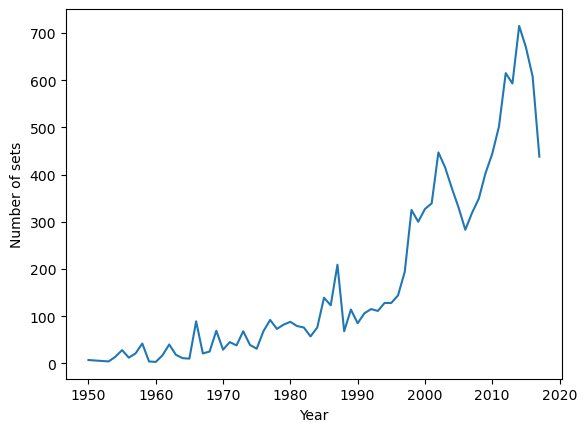

In [21]:
plt.plot(sets_per_year['year'], sets_per_year['count'])
plt.ylabel('Number of sets')
plt.xlabel('Year')
plt.show()

### Credits: https://youtu.be/BzQDi4D0B_M?si=3CDYGtDl_Wwl7sL2